## Setup

First, make sure to install the dependencies and import everything.

In [ ]:
%pip install numpy scipy matplotlib seaborn tqdm 

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from diffusion import *
from simulation import *
from comparison_plots import *

## Usage

All of the functions are highly modular, so the exact model is specified by 
* the iteration function for the finite population model (FPM), and
* the drift and diffusion functions for the diffusion approximation.

There are examples in the respective files (`simulation.py` and `diffusion.py`), but here is the simplest example of a neutral WF model.

In [3]:
# iteration function 
def WF(pop):
    freq = pop.mean()
    return np.random.binomial(1, freq, len(pop))

# drift function
a = lambda x: 0

# diffusion function 
b = lambda x: x*(1-x)

Then simulation works:

[0.3, 0.32, 0.28, 0.26, 0.14, 0.07, 0.04, 0.02, 0.02, 0.03, 0.05, 0.09, 0.08, 0.04, 0.05, 0.03, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0]


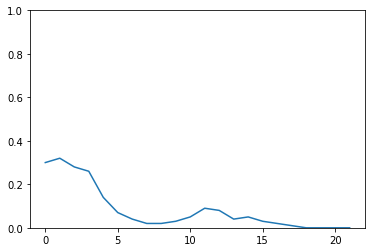

In [7]:
# single simulation run
res = simulate(WF, n_range=20, N=100, p_init=0.3)
print(res)

plt.plot(res)
plt.ylim(0,1);

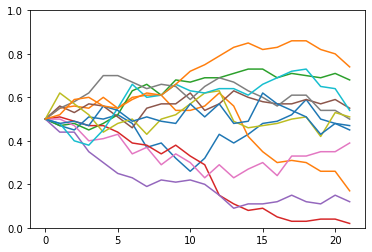

In [8]:
# batch simulaions
res = simulate_rep(WF, n_range=20, n_rep=12, N=100, p_init=0.5)

plt.plot(res)
plt.ylim(0,1);

Diffusion apprximation works as well!

100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


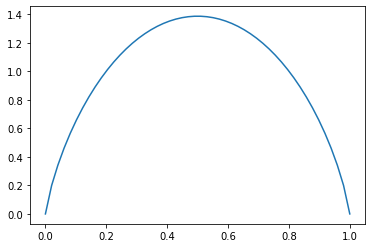

In [12]:
xs = np.linspace(0.0,1.0,50)
tbar = [t_bar(x, a, b) for x in tqdm(xs)]

plt.plot(xs,tbar);

Finally, we can compare simulation and diffusion!

100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


finished the FPM simulations!


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]


done computing diffusion values!


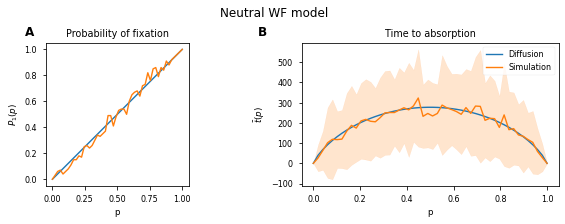

In [5]:
fig = diffusion_simulation_compare(WF, a, b, N=200, n_rep=100, n_points=50, suptitle='Neutral WF model')

Finally, let's do something harder: the model of conformity.

100%|██████████| 36/36 [00:35<00:00,  1.02it/s]


finished the FPM simulations!


100%|██████████| 36/36 [02:37<00:00,  4.38s/it]


done computing diffusion values!


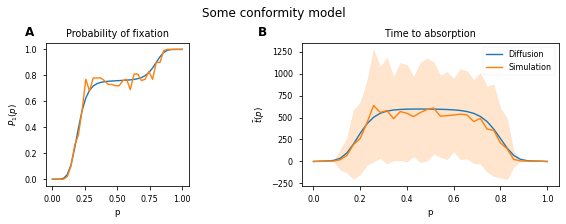

In [4]:
fig = diffusion_simulation_compare(iter_conformity_5rm(0.01, -1.9, 0.7), a_conformity_5rm(100,0.01,-1.9,0.7), b, 100, n_rep=100, n_points=36, suptitle='Some conformity model')

Wowzie! The two lines match again!